In [ ]:
#Das Model merkt sich die Daten 1:1
#-es werden die Distanzen berechnet
#-eine Möglichkeit hierfür ist die Euklidische Distanz //nicht gut wenn wir viele Dimensionen (punkte?) haben
#-Manhattan distanz // kann in einem hochdimensionalen Modell gut funktionieren

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

df=pd.read_csv("../data/Diabetes/diabetes.csv")

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X=df[["BMI","Age"]]
y=df["Outcome"]

X_train, X_test, y_train, y_test=train_test_split(X,y)


model= KNeighborsClassifier(n_neighbors=15)

##wichtige parameter: weights
##p -art der Distanzberechnung/ euklidisch,manhattan etc.
model.fit(X_train,y_train)

print(model.score(X_test,y_test))

0.65625


In [2]:
print(model.predict_proba(X_test))

[[0.6 0.4]
 [0.6 0.4]
 [0.8 0.2]
 [0.6 0.4]
 [0.2 0.8]
 [1.  0. ]
 [0.6 0.4]
 [0.4 0.6]
 [1.  0. ]
 [0.4 0.6]
 [0.4 0.6]
 [0.4 0.6]
 [0.4 0.6]
 [1.  0. ]
 [0.2 0.8]
 [0.6 0.4]
 [0.8 0.2]
 [0.4 0.6]
 [0.8 0.2]
 [0.4 0.6]
 [0.6 0.4]
 [0.8 0.2]
 [0.8 0.2]
 [0.6 0.4]
 [0.2 0.8]
 [0.8 0.2]
 [0.8 0.2]
 [1.  0. ]
 [0.8 0.2]
 [0.4 0.6]
 [0.4 0.6]
 [1.  0. ]
 [0.8 0.2]
 [0.6 0.4]
 [0.2 0.8]
 [0.8 0.2]
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 [0.6 0.4]
 [0.2 0.8]
 [0.6 0.4]
 [1.  0. ]
 [1.  0. ]
 [0.6 0.4]
 [1.  0. ]
 [1.  0. ]
 [0.6 0.4]
 [1.  0. ]
 [0.8 0.2]
 [0.8 0.2]
 [0.2 0.8]
 [0.4 0.6]
 [0.6 0.4]
 [0.4 0.6]
 [0.8 0.2]
 [0.8 0.2]
 [0.4 0.6]
 [0.8 0.2]
 [0.4 0.6]
 [1.  0. ]
 [0.6 0.4]
 [0.8 0.2]
 [1.  0. ]
 [0.4 0.6]
 [0.8 0.2]
 [1.  0. ]
 [0.4 0.6]
 [0.4 0.6]
 [1.  0. ]
 [1.  0. ]
 [0.6 0.4]
 [0.8 0.2]
 [0.6 0.4]
 [0.2 0.8]
 [0.6 0.4]
 [1.  0. ]
 [0.8 0.2]
 [0.6 0.4]
 [0.8 0.2]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.4 0.6]
 [0.8 0.2]
 [1.  0. ]
 [0.4 0.6]
 [0.6 0.4]
 [0.4 0.6]

## Entscheidungsgrenze

In [7]:
bmi_min=df["BMI"].min()
bmi_max=df["BMI"].max()

age_min=df["Age"].min()
age_max=df["Age"].max()

In [12]:
bmi_range=np.arange(bmi_min, bmi_max, 0.1) 


In [13]:
age_range=np.arange(age_min, age_max, 0.1)

In [14]:
xx,yy = np.meshgrid(bmi_range, age_range) #//Erstellt einen Grid 

In [15]:
X_pred= np.c_[xx.ravel(),yy.ravel()] #// ravel() is the shape as reshape(-1)
#c_ combiniert die zwei eindimensionale arrays 


In [17]:
zz=model.predict(X_pred)

In [19]:
print(xx.shape)
print(zz.shape)  #zz muss in die ursprüngliche Version zurückgewndelt werden

(600, 671)
(402600,)


In [20]:
zz=zz.reshape(xx.shape) 

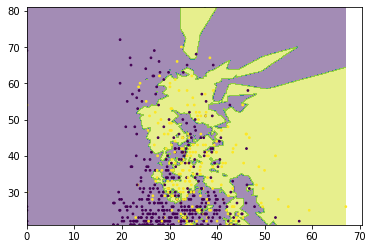

In [24]:
import matplotlib.pyplot as plt

plt.contourf(xx,yy,zz, alpha=0.5)
plt.scatter(X_train["BMI"], X_train["Age"], c=y_train, s=3) #c-colour s-size

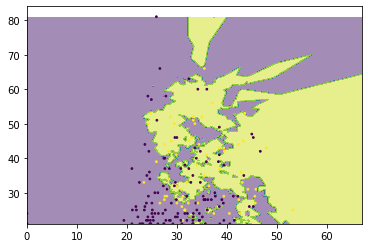

In [25]:
plt.contourf(xx,yy,zz, alpha=0.5)
plt.scatter(X_test["BMI"], X_test["Age"], c=y_test, s=3)